In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import re
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker
import tikzplotlib

sns.set(context="paper")

In [2]:
def create_single_df(file_name):
    with open(file_name) as f:
        results = json.load(f)['results']

    trainer = []
    rule_value = []
    rule_type = []
    training_time = []
    memory = []

    regex = re.compile(r'0: Memory Usage: (\d+\.\d+), Training Duration: (\d+\.\d+)')

    for result in results:
        trainer.append(result["trainer"].capitalize())
        rule_value.append(result['rule_value'])
        rule_type.append(result['rule_type'])
        memory.append(float(regex.search(result['stderr']).group(1)))
        training_time.append(float(regex.search(result['stderr']).group(2)))

    return pd.DataFrame({"Trainer Type": trainer, "Rule Type": rule_type, "Rule Value": rule_value, "Training Time": training_time, "Memory": memory})

def create_df():
    return pd.concat([create_single_df("results_network_202007211500.json"), create_single_df("results_network_202007211630.json")])
    

In [3]:
df = create_df()
delay = df[df["Rule Type"] == "delay"].drop("Rule Type", axis=1)
loss = df[df["Rule Type"] == "loss"].drop("Rule Type", axis=1)

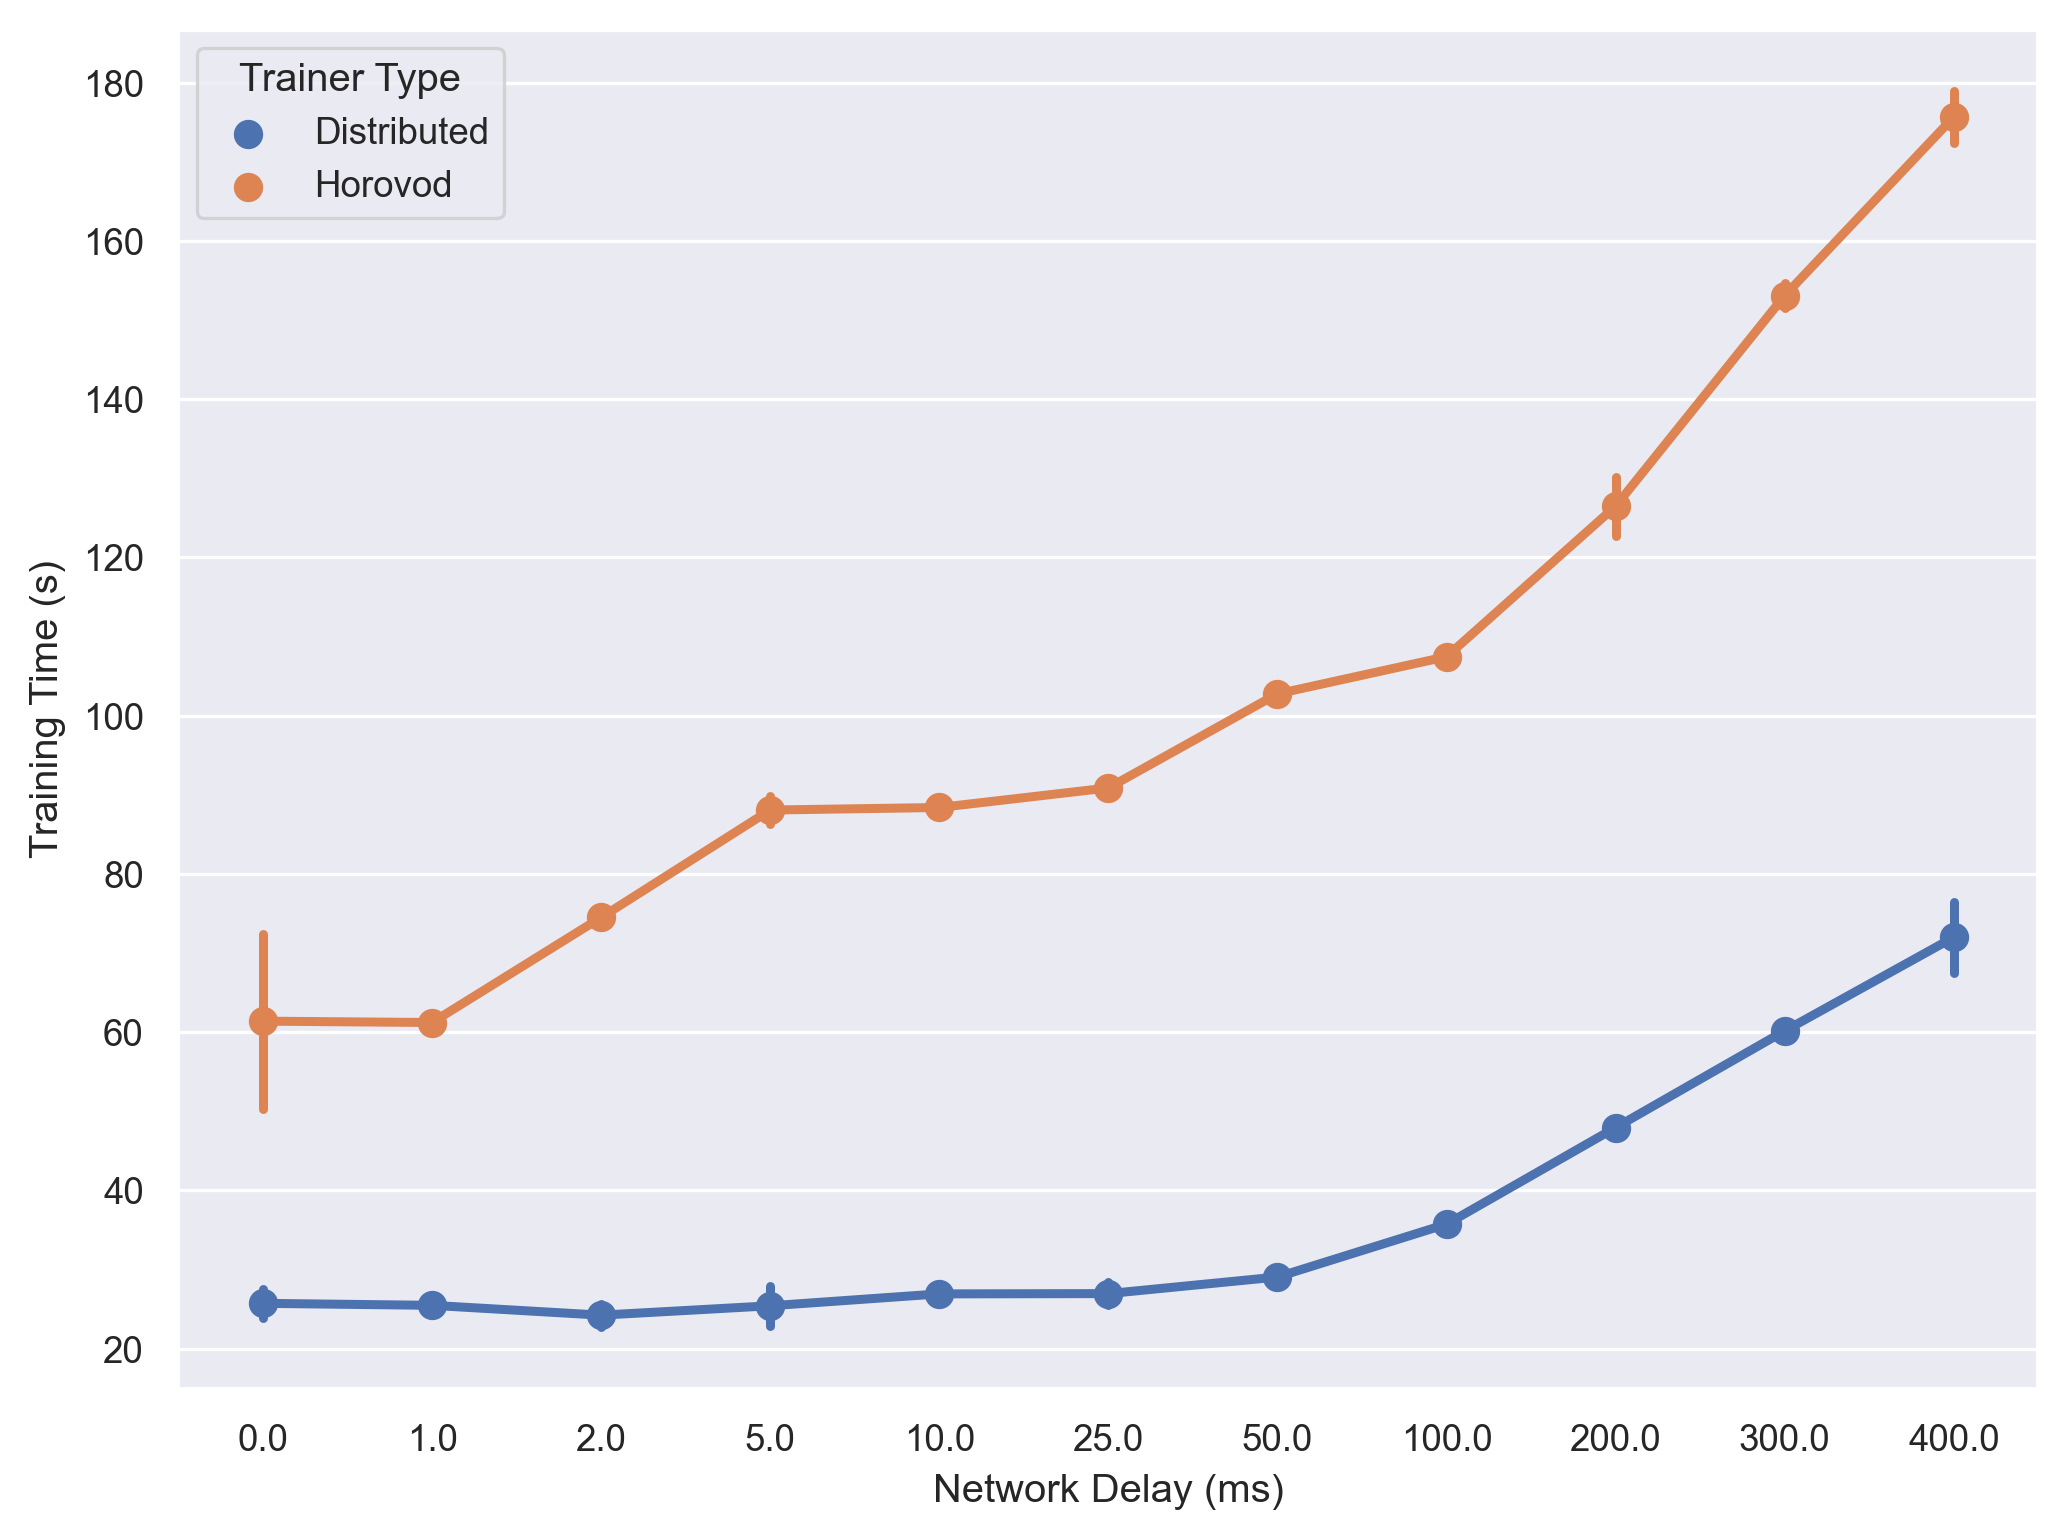

In [4]:
fig = plt.figure(figsize=(8, 6), dpi=300, facecolor="w")
fig.patch.set_alpha(0.0)
ax = sns.pointplot(x="Rule Value", y="Training Time", data=delay, hue="Trainer Type", err_style="bars", ci=68)
#ax.set_title("Training Time per Epoch depending on Network Delay")
ax.set_xlabel("Network Delay (ms)")
ax.set_ylabel("Training Time (s)")
#plt.savefig("network_delay.png", dpi=300)
tikzplotlib.save(f"network_delay.tex", figure=fig)
plt.show()

In [5]:
loss.loc[loss["Training Time"] > 200, "Training Time"] = 100

In [6]:
outlier = loss.loc[(loss["Rule Value"] == 15) & (loss["Training Time"] == 100)]
outlier_pos = outlier[["Rule Value", "Training Time"]].values[0]
outlier_text = outlier_pos + (-6, -20)
arrowprops = dict(facecolor='black', edgecolor="black", arrowstyle="simple")
bbox = dict(boxstyle="round", fc="0.8", edgecolor="grey")

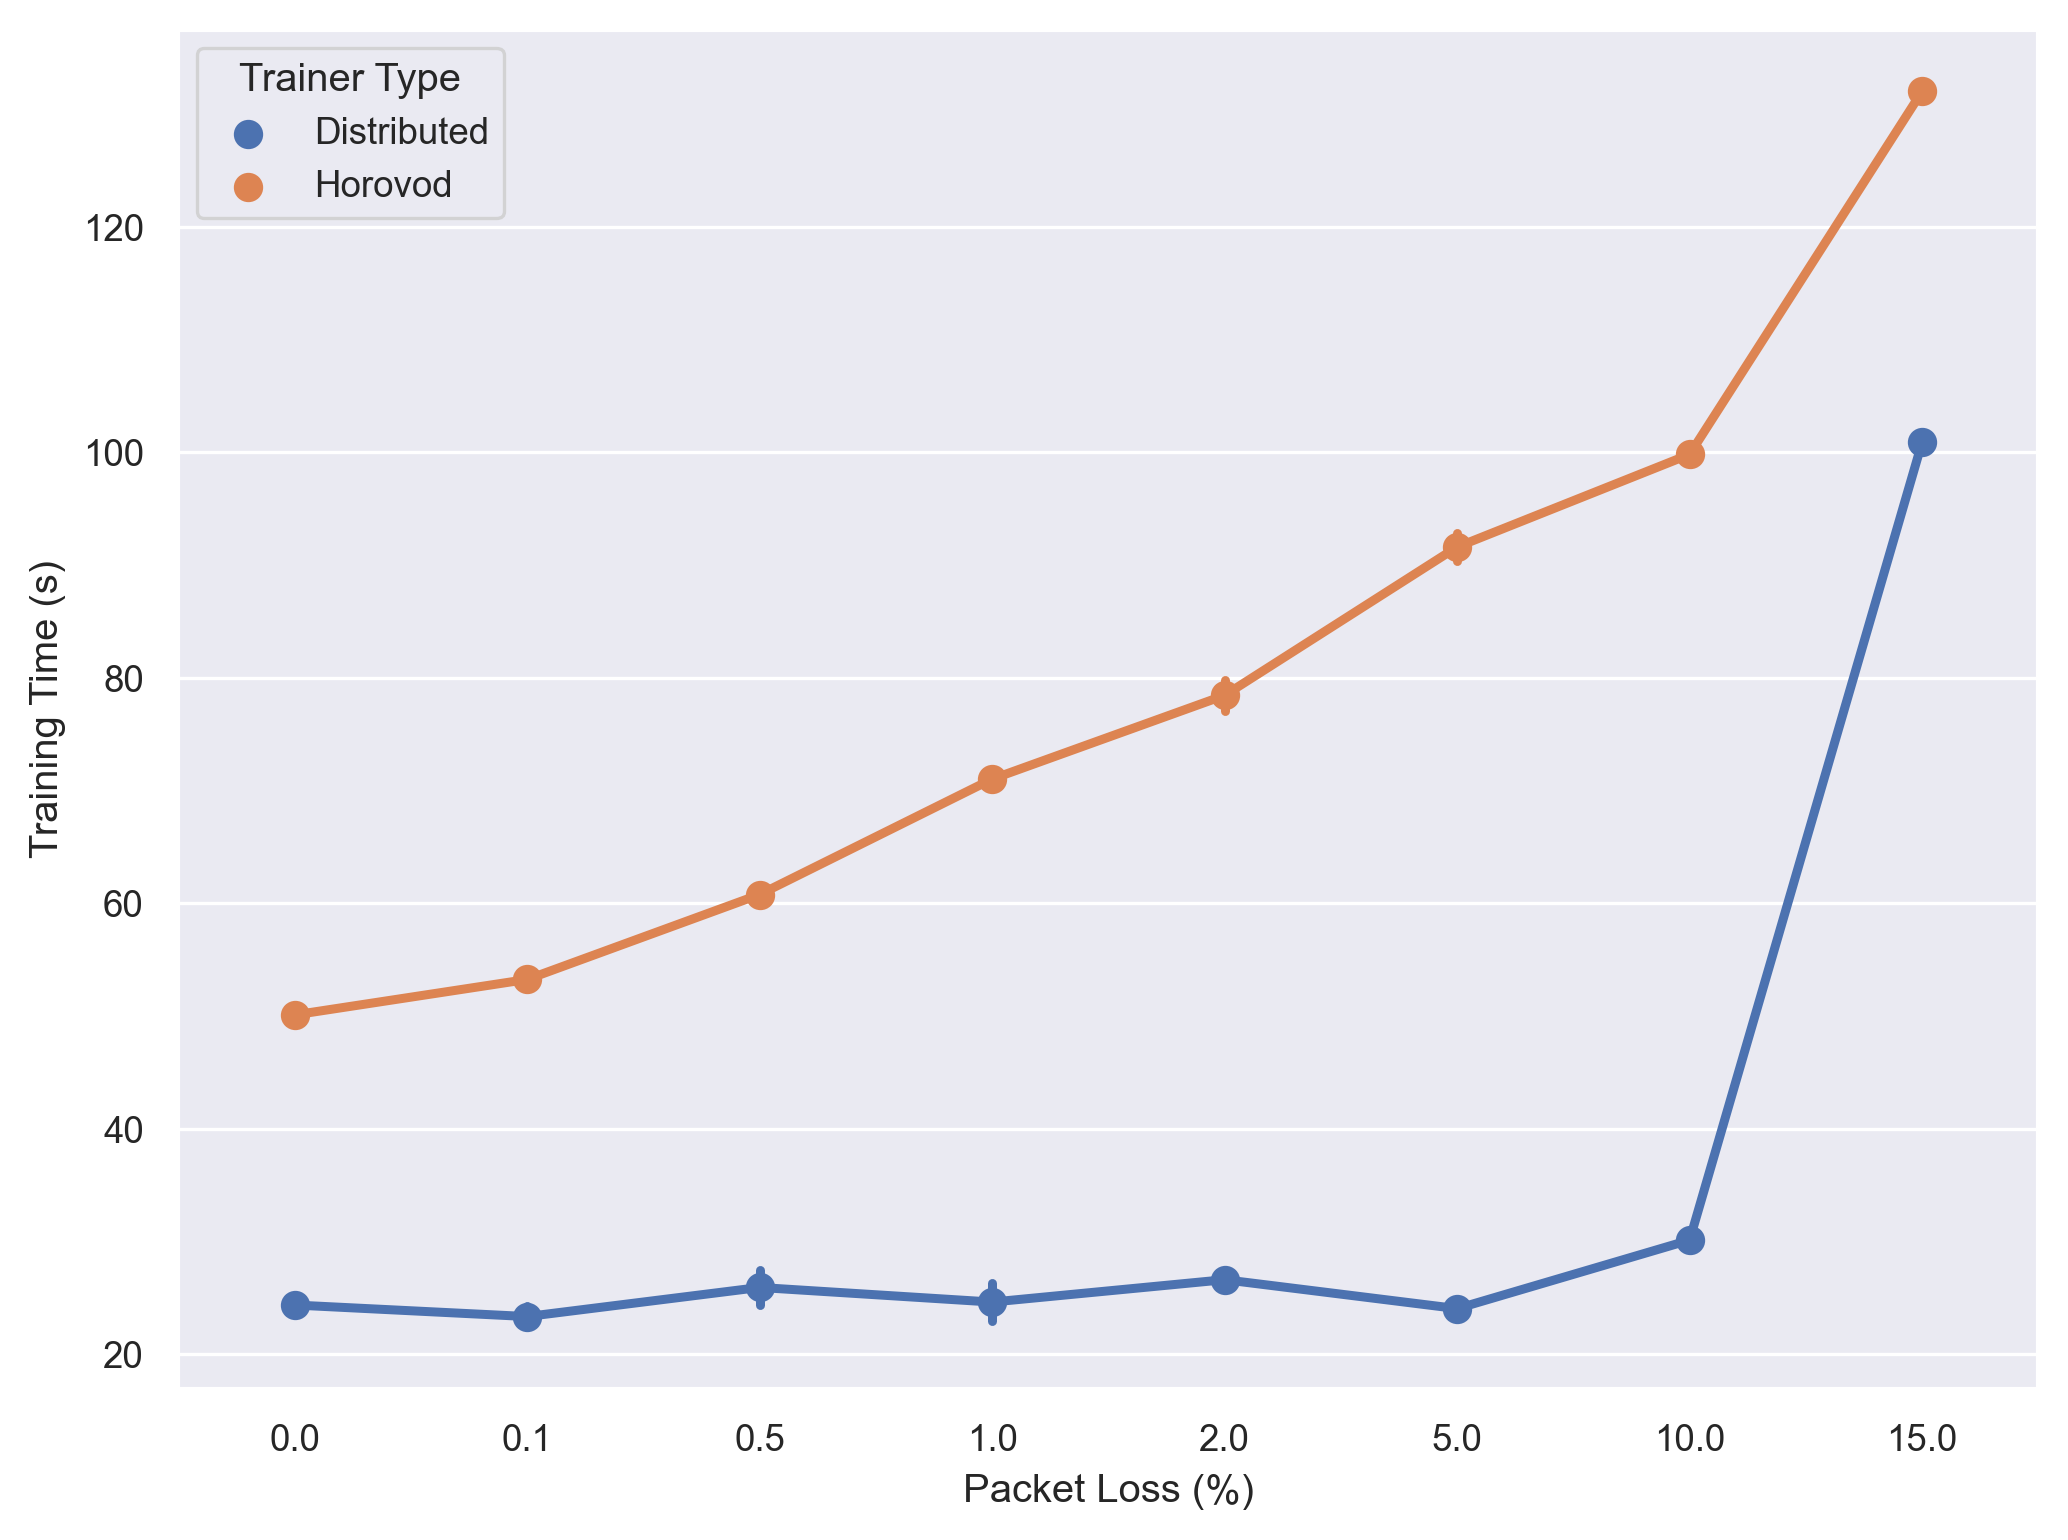

In [7]:
fig = plt.figure(figsize=(8, 6), dpi=300)
fig.patch.set_alpha(0.0)
ax = sns.pointplot(x="Rule Value", y="Training Time", data=loss, hue="Trainer Type", err_style="bars", ci=68)
#ax.set_title("Training Time per Epoch depending on Packet Loss (Outlier removed)")
ax.set_xlabel("Packet Loss (%)")
ax.set_ylabel("Training Time (s)")
#ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))
#plt.savefig("package_loss.png", dpi=300)
tikzplotlib.save(f"package_loss.tex", figure=fig)
plt.show()